In [17]:
import pandas as pd
import plotly_express as px
df= pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
X = df.drop('variety',axis = 1)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [26]:
# visualize the data
px.scatter(df,x = "sepal.length",y = "sepal.width",color ="variety", title = "IRIS Dataset",template = 'none',
          color_discrete_sequence=px.colors.qualitative.Set1)

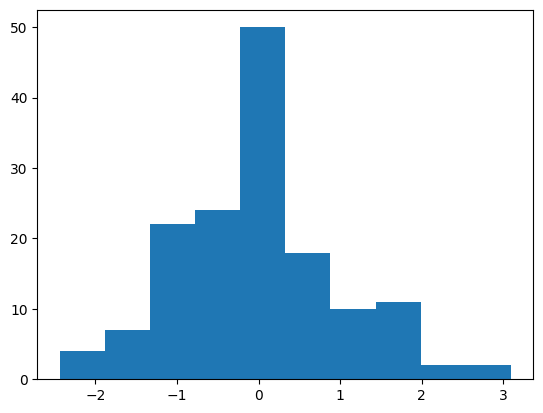

In [60]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
t = x_scaled[:,1]
plt.hist(t)

from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform,(x_scaled)


In [67]:
y = x_pca[1][:,:2]
x_pca[1]
dt = pd.DataFrame(y,columns = ['C1','C2'])
dt['variety'] = df['variety']
dt.head()

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [62]:
# visualize the data
px.scatter(dt,x = "C1",y = "C2",color ="variety", title = "IRIS Dataset",template = 'none',
          color_discrete_sequence=px.colors.qualitative.Set1)


In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

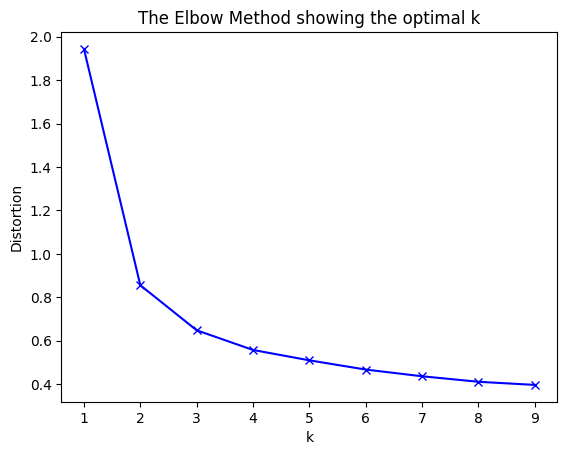

In [24]:
distortions = []
import warnings
warnings.filterwarnings('ignore')
K =  range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



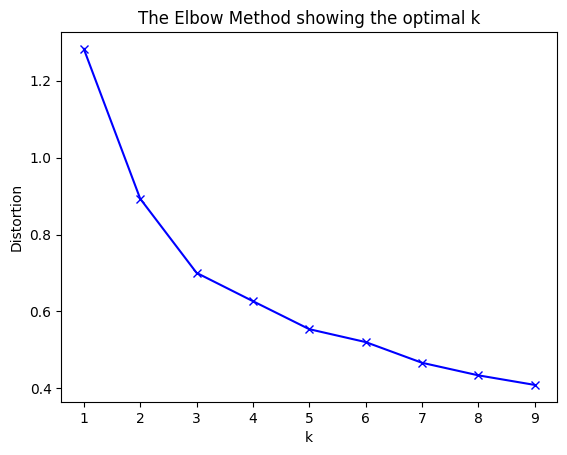

In [73]:
# working on PCA data
distortions = []
X = y.copy()
import warnings
warnings.filterwarnings('ignore')
K =  range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [74]:
#X = scale(X)

cluster =  KMeans(n_clusters = 3)
cluster.fit(y)

KMeans(n_clusters=3)

In [75]:
centers = cluster.cluster_centers_ # add the cluster centers to the graph
labels = cluster.labels_
# from sklearn.preprocessing import LabelEncoder
# enc= LabelEncoder()
# from sklearn.metrics import confusion_matrix
# confusion_matrix(labels,enc.fit_transform(df['variety']))

In [76]:
centers

array([[-1.00206653,  0.90625492],
       [-0.10143926, -0.94652188],
       [ 1.10971635,  0.09821729]])

In [77]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [78]:
df['predicted'] = labels
df.iloc[101:,:]

,sepal.length,sepal.width,petal.length,petal.width,variety,predicted
101,5.8,2.7,5.1,1.9,Virginica,1
102,7.1,3.0,5.9,2.1,Virginica,2
103,6.3,2.9,5.6,1.8,Virginica,2
104,6.5,3.0,5.8,2.2,Virginica,2
105,7.6,3.0,6.6,2.1,Virginica,2
106,4.9,2.5,4.5,1.7,Virginica,1
107,7.3,2.9,6.3,1.8,Virginica,2
108,6.7,2.5,5.8,1.8,Virginica,1
109,7.2,3.6,6.1,2.5,Virginica,2
110,6.5,3.2,5.1,2.0,Virginica,2
